In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate data:
- We train a classifier on 3 classes, labels : 0, 1, 2
- Total number of training examples m = 30
- Each class has 10 training examples
- Print X and y to see the data
- Number of features n = 2

In [10]:
np.random.seed(2)

# generate data, X is training data and y is training label
mean = [[1,1], [1,5],[5,1]]
cov = [[1,0],[0,1]]

n_classes = 3
num_each_class = 10
m = num_each_class * n_classes
n_features = 2

# generate data of class 0
X0 = np.random.multivariate_normal(mean[0], cov, num_each_class)
y0 = np.zeros((num_each_class,1))

# generate data of class 1
X1 = np.random.multivariate_normal(mean[1], cov, num_each_class)
y1 = np.ones((num_each_class,1))

# generate data of class 2
X2 = np.random.multivariate_normal(mean[2], cov, num_each_class)
y2 = np.array([2]*num_each_class).reshape(-1,1)

# concatenate data of the three classes
X = np.vstack([X0, X1, X2])
y = np.vstack([y0,y1,y2])


print(y)

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]]


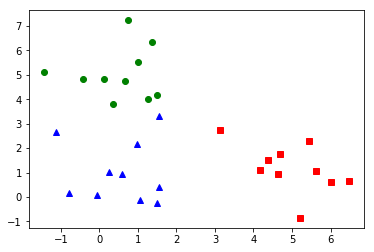

In [11]:
# plot data of 2 classes

# plot data of class 0
plt.plot(X0[:,0], X0[:,1], 'b^')

# plot data of class 1
plt.plot(X1[:,0], X1[:,1], 'go')

# plot data of class 2
plt.plot(X2[:,0], X2[:,1], 'rs')

# 2. Feature scaling:
- Your first task is to complete feature scaling
- This function return X_scaled, mean and standard deviation

In [12]:
# perform feature scaling on X and assign it to X
def feature_scaling(X):
    #  =================== YOUR CODE HERE =======================
    mean = np.mean(X,axis=0)
    stddev = np.std(X,axis=0)
    X_scaled = (X-mean)/stddev
    # ===========================================================

    return X_scaled, mean, stddev


# assign value returned by feature_scaling() function to X
X_scaled, mean, stddev = feature_scaling(X)

In [13]:
# create Xbar
Xbar = np.hstack([np.ones((m,1)), X_scaled])

# 3. Cost and gradients:
- Complete sigmoid() function and h() function, remember that h() do 2 things: 1 is performing linear transform, and 2 is apply sigmoid function on that linear transform
- Complete cost_and_gradient(), remember to use Xbar, not X

In [14]:
def sigmoid(Z):
  #  =================== YOUR CODE HERE =======================
  return 1./(1+np.exp(-Z))
  # ===========================================================

    
def h(Xbar, w):
    #  =================== YOUR CODE HERE =======================
    return sigmoid(Xbar.dot(w))
    # ===========================================================
  
  
def cost_and_gradients(Xbar,y,w):
    J, grad = None, None
    #  =================== YOUR CODE HERE =======================
    J = 1/m*(- y.T.dot(np.log(h(Xbar,w))) - (1-y).T.dot(np.log(1-h(Xbar,w))) )
    grad = 1/m*Xbar.T.dot(h(Xbar,w) - y)
    # ===========================================================
    return J, grad
  
  

In [15]:
def train(Xbar,y,w):
    lr = 0.02
    n_iters = 1000
    # ==================== YOUR CODE HERE ======================
    for i in range(n_iters):
        
        # compute cost and gradients using cost_and_gradients() function
        cost, grad = cost_and_gradients(Xbar, y,w)
        
        if(i % 100 == 0):
            print("cost at iteration %d: %f:"%(i,cost))
    
        # update w using grad
        w -= lr*grad
  
    # ==========================================================

    return w

# 4. Train one-vs-rest model
- What if we want to classify more than 2 classes, for example 3 classes? See this video to get the idea about one vs rest model: https://www.coursera.org/lecture/machine-learning/multiclass-classification-one-vs-all-68Pol
- In one_vs_rest() function below, we define 3 binary sub models:
    - Classifier: 0 vs (1,2)
    - Classifier: 1 vs (0,2)
    - Classifier: 2 vs (0,1)
- With each model, convert its true label to 1 (positive), and the other labels to 0 (negative)
    - For example: if y = [0 0 0 1 1 1 2 2 2]
        - With classifier 0 vs (1,2), y_convert = [1 1 1 0 0 0 0 0 0]
        - With classifier 1 vs (0,2), y_convert = [0 0 0 1 1 1 0 0 0]
        - With classifier 2 vs (0,1), y_convert = [0 0 0 0 0 0 1 1 1]
- Train each of these classifier on a different parameter vector:
    - With classifier 0 vs (1,2): w0_12
    - With classifier 1 vs (0,2): w1_02
    - With classifier 2 vs (0,1): w2_01
- Predict an input to be 0, 1 or 2?
    - Compute y_hat on each classifier using corresponding parameter w
    - Compare y_hat of these 3 classes, the input data will be labeled by the model having highest y_hat
        - For example: 
            - With classifier 0 vs (1,2): y_hat = 0.82
            - With classifier 1 vs (0,2): Y_hat = 0.55
            - With classifier 2 vs (0,1): w2_01 = 0.12
            - We conclude that this input's label will be 0
        - For example: 
            - With classifier 0 vs (1,2): y_hat = 0.38
            - With classifier 1 vs (0,2): Y_hat = 0.61
            - With classifier 2 vs (0,1): w2_01 = 0.33
            - We conclude that this input's label will be 1
        - For example: 
            - With classifier 0 vs (1,2): y_hat = 0.23
            - With classifier 1 vs (0,2): Y_hat = 0.44
            - With classifier 2 vs (0,1): w2_01 = 0.67
            - We conclude that this input's label will be 2

In [16]:
np.random.seed(2)

# apply one-vs-rest model
def one_vs_rest_model(Xbar,y):
    w0_12 = np.random.randn(n_features+1, 1)
    w1_02 = np.random.randn(n_features+1, 1)
    w2_01 = np.random.randn(n_features+1, 1)

    # model 0 vs (1,2)
    idx0_12 = y == 0
    y0_12 = y.copy()
    y0_12[idx0_12] = 1
    y0_12[~idx0_12] = 0


    idx1_02 = y == 1
    y1_02 = y.copy()
    y1_02[idx1_02] = 1
    y1_02[~idx1_02] = 0


    idx2_01 = y == 2
    y2_01 = y.copy()
    y2_01[idx2_01] = 1
    y2_01[~idx2_01] = 0


    # train on model 0 vs 12
    w0_12 = train(Xbar,y0_12,w0_12)

    # train on model 1 vs 02
    w1_02 = train(Xbar,y1_02,w1_02)

    # train on model 2 vs 01
    w2_01 = train(Xbar,y2_01,w2_01)
  
    return w0_12, w1_02, w2_01
  
w0_12, w1_02, w2_01 = one_vs_rest_model(Xbar, y)

cost at iteration 0: 0.582519:
cost at iteration 100: 0.380010:
cost at iteration 200: 0.299125:
cost at iteration 300: 0.262290:
cost at iteration 400: 0.242062:
cost at iteration 500: 0.229101:
cost at iteration 600: 0.219809:
cost at iteration 700: 0.212619:
cost at iteration 800: 0.206771:
cost at iteration 900: 0.201856:
cost at iteration 0: 1.409501:
cost at iteration 100: 0.906465:
cost at iteration 200: 0.589515:
cost at iteration 300: 0.407340:
cost at iteration 400: 0.309101:
cost at iteration 500: 0.253800:
cost at iteration 600: 0.219714:
cost at iteration 700: 0.196764:
cost at iteration 800: 0.180177:
cost at iteration 900: 0.167526:
cost at iteration 0: 1.304521:
cost at iteration 100: 0.730349:
cost at iteration 200: 0.467310:
cost at iteration 300: 0.333849:
cost at iteration 400: 0.259212:
cost at iteration 500: 0.213107:
cost at iteration 600: 0.182125:
cost at iteration 700: 0.159913:
cost at iteration 800: 0.143189:
cost at iteration 900: 0.130117:


# 5. Predict:
- Compute y_hat of each class
- Compare those 3 y_hats and get label with highest y_hat
- Remember _Xbar input can be a matrix, so variable 'label' should be a column vector of label

In [17]:
def predict(_Xbar, w0_12, w1_02, w2_01):

    y_hat_0_12  = h(_Xbar, w0_12)
    y_hat_1_02  = h(_Xbar, w1_02)
    y_hat_2_01  = h(_Xbar, w2_01)
  
 
  
    # compare these 3 probability and return label of this point
    #  =================== YOUR CODE HERE =======================

    y_hat = np.hstack([y_hat_0_12, y_hat_1_02, y_hat_2_01])
    label = np.argmax(y_hat, axis=1)

    return label
    # ===========================================================
  
  
label = predict(Xbar, w0_12, w1_02, w2_01)
print("True label: ")
print(y.reshape(-1,))
print("Predicted label: ")
print(label)

True label: 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
Predicted label: 
[0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


In [18]:
y_hat = predict(Xbar, w0_12, w1_02, w2_01)

(1936, 3)


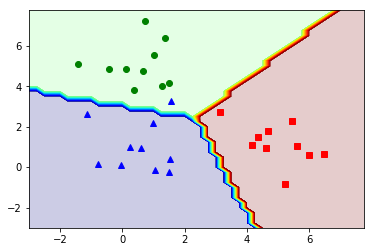

In [19]:
def plot_contour():
    # plot data of 2 classes

    # plot data of class 0
    plt.plot(X0[:,0], X0[:,1], 'b^')

    # plot data of class 1
    plt.plot(X1[:,0], X1[:,1], 'go')

    # plot data of class 2
    plt.plot(X2[:,0], X2[:,1], 'rs')

    x1_plot = np.arange(-3, 8, 0.25)
    x2_plot = np.arange(-3, 8, 0.25)

    xx1, xx2 = np.meshgrid(x1_plot, x2_plot)
    #print(xx)
    x1 = np.reshape(xx1,(xx1.shape[0]*xx1.shape[1],1))
    x2 = np.reshape(xx2,(xx2.shape[0]*xx2.shape[1],1))

    _X = np.append(x1,x2,axis=1)
    _X_scaled, _mean, _stddev = feature_scaling(_X)
    _Xbar = np.append(np.ones((x1.shape[0],1)), _X_scaled, axis=1)


    print(_Xbar.shape)

    z = predict(_Xbar, w0_12, w1_02, w2_01)

    z = np.reshape(z, (len(x1_plot), len(x2_plot)))

    h = plt.contourf(x1_plot,x2_plot,z,200, cmap='jet',  alpha=.2)
    
plot_contour()

In [3]:
X = np.random.randn(3,3)*10

In [4]:
X

array([[ -5.03550453,   5.25482487,  -6.54731953],
       [ -3.33511766,  -2.37943075,  15.14881523],
       [  4.86011024,  10.689036  ,  16.98666523]])

In [6]:
np.argmax(X,axis = 0)

array([2, 2, 2])

In [9]:
a = np.argmax(X,axis = 1)
a.shape

(3,)